# CS5841 Regression Project
### Wei Qian

1. def my_regression(trainX, testX, noutputs)

       The input variables are:
    - `trainX` - an [ntrain x (nfeature + noutputs)] array that contains the features in the first 'nfeature' columns and the outputs in the last 'noutput' columns
    - `testX`- an [ntest x nfeature] array of test data for which the predictions are made
    - `noutputs` - the number of output columns in trainX
    
    The output is:
    - an [ntest x noutputs] array, which contains the prediction values for the testX data
    
    We have three regression models: linear, polynomial degree 2, and polynomial degree 3.
    
    In my_regression function, we deliver trainX to linear_regression function, polynomial_regression function of degree 2, and polynomial_regression function of degrees 3. Then compute the 5-fold cross-validation of each function and find the least mean squared error of the model. Finally, we apply the best model to make prediction of testX.
    
    In linear_regression function, we first convert trainX to matrix, split it to x_train that contains the first 'nfeature' columns and y_train that contains the outputs in last 'noutputs' columns. Then, we add a column of 1s at first of x_train as bias. We also compute the determinant of the matrix to see if it is irreversible. Next, we use lease squares to find the model: $$w = {(\Phi^T\Phi)^{-1}\Phi^T{t}}$$ <br>So in linear regression, w[0] is the bias, w[1] is the coefficient (for multi-dimension data, the first noutputs of w are the biases, the rest are coefficients), and the final model is for one-dimension: $$y = {w_0+w_1{x}}$$
    
    In polynomial_regresion function, we have input variables of testX and degree. The lease squares is same as linear function, we only need to expand trainX in initialization. For example, for 2 features input $x_1,x_2$, the matrix format is [$1, x_1, x_2, {x_1}{x_2}, {x_1}^2, {x_2}^2$]. So in polynomial regression degree 2, w[0] is the bias, w[1], w[2] are the coefficients (for multi-dimension data, the first noutputs of w are the biases, the rest are coefficients), and the final model for one-dimension is: $$y = {w_0+w_1{x}+w_2{x^2}}$$ For polynomial degree 3, the final model for one-dimension is: $$y = {w_0+w_1{x}+w_2{x^2}+w_3{x^3}}$$
    
    In linear_cross_validation and polynomial_cross_validation functions, we just separate the trainX into 5 subarrays, every time we choose of one the subarrays as new training data and the rest as new test data. Then we calculate the mean squared error of 5 tests. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

def linear_regression(X_train):
    X_train=np.mat(X_train) #interpret as a matrix
    x_train=X_train[:,:-noutputs] #features
    y_train=X_train[:,-noutputs:] #noutputs

    x_train=np.column_stack((np.ones(len(x_train)),x_train)) #add a column of 1s at first as bias
    
    xTx=x_train.T*x_train #matrix transpose and multiplication
    if np.linalg.det(xTx)==0.0: #compute the determinant of a matrix, if matrix is irreversible, return
        return ['None']
    else:
        w=np.ravel(xTx.I*x_train.T*y_train) #matrix inverse, lease squares and convert to array
    return w

def polynomial_regression(X_train,degree):
    X_train=np.mat(X_train) #interpret as a matrix
    x_train=X_train[:,:-noutputs] #features
    y_train=X_train[:,-noutputs:] #noutputs
   
    poly = PolynomialFeatures(degree)
    x_train=poly.fit_transform(x_train) #use sklearn to expand x_train 
    x_train=np.mat(x_train)
    
    xTx=x_train.T*x_train #matrix transpose and multiplication
    if np.linalg.det(xTx)==0.0: #compute the determinant of a matrix, if matrix is irreversible, return
        return ['None']
    else:
        w=np.ravel(xTx.I*x_train.T*y_train) #matrix inverse, lease squares and convert to array
    return w

def linear_cross_validation(validateSet,fold):
    X=np.array_split(validateSet,fold) #split array into 5 groups
    sqerror=0
    for i in range(fold):
        X_test=X[i] #select one fold as a test case
        #print(X,"\n")
        X_train=np.delete(X,i,0) #select the rest as train cases
        #print(X,"----\n")
        X_train=np.concatenate(X_train)
        w=linear_regression(X_train)
        X_test=np.mat(X_test)
        x_test=X_test[:,:-noutputs]
        y_test=X_test[:,-noutputs:]
        
        bias=w[:noutputs] #bias are the first noutputs numbers
        coef=w[noutputs:] #coefficients are the rest numbers
        
        error=0 #calculate total mean squared error of noutputs
        for j in range(noutputs):
            y_test_pred=0 #prediction of the test
            coefCnt=len(coef)//noutputs #number of coefficient for every output
            for i in range(coefCnt):
                y_test_pred+=coef[j*coefCnt+i]*x_test[:,i]
            y_test_pred+=bias[j]
            error+=np.square(y_test[:,j] - y_test_pred).mean() #mean squared error of each output column
        sqerror+=error
    return sqerror/fold #mean squared error of k-fold

def polynomial_cross_validation(validateSet,degree,fold):
    X=np.array_split(validateSet,fold) #split array into 5 groups
    sqerror=0
    for i in range(fold):
        X_test=X[i] #select one fold as a test case
        X_train=np.delete(X,i,0) #select the rest as train cases
        X_train=np.concatenate(X_train)
        w=polynomial_regression(X_train,degree)
        
        X_test=np.mat(X_test)
        x_test=X_test[:,:-noutputs]
        y_test=X_test[:,-noutputs:]
        poly = PolynomialFeatures(degree)
        x_test=poly.fit_transform(x_test) #use sklearn expand x_test
        x_test=np.mat(x_test)
        x_test=x_test[:,1:] #remove first bias
        
        bias=w[:noutputs]
        coef=w[noutputs:]
        
        error=0 #calaulate total mean squared error of noutputs
        for j in range(noutputs):
            coefCnt=len(coef)//noutputs #the number of coefficient for every output
            y_test_pred=0 #prediction of the test
            for i in range(coefCnt):
                y_test_pred+=coef[j*coefCnt+i]*x_test[:,i]
            y_test_pred+=bias[j]
            error+=np.square(y_test[:,j] - y_test_pred).mean() #mean squared error of each noutputs column
        sqerror+=error
    return sqerror/fold #mean squared error of k-fold

def my_regression(trainX,testX,noutputs):
    #linear regression
    print("-"*70)
    print('Linear Regression')
    line_w=linear_regression(trainX)
    line_mes=float("inf")
    if line_w[0]=='None':
        print ("Matrix is irreversible!\n") 
    else:
        print('Bias:',line_w[:noutputs])
        print('Coefficients:',line_w[noutputs:])
    
        #5-fold cross validation
        line_mse=linear_cross_validation(trainX,5)
        print("MSE:",line_mse,"\n")
    
    #polynomial regression (degree 2)
    print('Polynomial Regression (Degree 2)')
    poly_w2=polynomial_regression(trainX,2)
    poly_mse2=float("inf")
    if poly_w2[0]=='None':
        print ("Matrix is irreversible!\n")
    else:
        print('Bias:',poly_w2[:noutputs])
        print('Coefficients:',poly_w2[noutputs:])
    
        #5-fold cross validation
        poly_mse2=polynomial_cross_validation(trainX,2,5)
        print("MSE:",poly_mse2,"\n")
    
    #polynomial regression (degree 3)
    print('Polynomial Regression (Degree 3)')
    poly_w3=polynomial_regression(trainX,3)
    poly_mse3=float("inf")
    if poly_w3[0]=='None':
        print ("Matrix is irreversible!")
    else:
        print('Bias:',poly_w3[:noutputs])
        print('Coefficients:',poly_w3[noutputs:])
    
        #5-fold cross validation
        poly_mse3=polynomial_cross_validation(trainX,3,5)
        print("MSE:",poly_mse3)
    print("-"*70,"\n")
    
    #determine the right model for the training data
    Y_test_pred=np.array([])
    if(line_mse<poly_mse2 and line_mse<poly_mse3):
        print("Linear regression is best!\n")
        testX=np.mat(testX)
        bias=line_w[:noutputs]
        coef=line_w[noutputs:]
        for j in range(noutputs):
            y_test_pred=0 #prediction of each output column test
            coefCnt=len(coef)//noutputs #number of coefficient for every output
            for i in range(coefCnt):
                y_test_pred+=coef[j*coefCnt+i]*testX[:,i]
            y_test_pred+=bias[j]
            if Y_test_pred.size>0: 
                Y_test_pred=np.concatenate((Y_test_pred,y_test_pred),axis=1) #combine output columns
            else:
                Y_test_pred=y_test_pred
    elif (poly_mse2<line_mse and poly_mse2<poly_mse3):
        print("Polynomial regression degree 2 is best!\n")
        poly = PolynomialFeatures(2)
        testX=poly.fit_transform(testX) #use sklearn expand x_test in order to match the coefficients
        testX=np.mat(testX)
        testX=testX[:,1:] #remove first biases
        bias=poly_w2[:noutputs]
        coef=poly_w2[noutputs:]
        for j in range(noutputs):
            y_test_pred=0 #prediction of each output column test
            coefCnt=len(coef)//noutputs #number of coefficient for every output
            for i in range(coefCnt):
                y_test_pred+=coef[j*coefCnt+i]*testX[:,i]
            y_test_pred+=bias[j]
            if Y_test_pred.size>0:
                Y_test_pred=np.concatenate((Y_test_pred,y_test_pred),axis=1) #combine output columns
            else:
                Y_test_pred=y_test_pred
    else:
        print("Polynomial regression degree 3 is best!\n")
        poly = PolynomialFeatures(3)
        testX=poly.fit_transform(testX) #use sklearn expand x_test in order to match the coefficients
        testX=np.mat(testX)
        testX=testX[:,1:] #remove first biases
        bias=poly_w3[:noutputs]
        coef=poly_w3[noutputs:]
        for j in range(noutputs):
            y_test_pred=0 #prediction of each output column test
            coefCnt=len(coef)//noutputs #number of coefficient for every output
            for i in range(coefCnt):
                y_test_pred+=coef[j*coefCnt+i]*testX[:,i]
            y_test_pred+=bias[j]
            if Y_test_pred.size>0:
                Y_test_pred=np.concatenate((Y_test_pred,y_test_pred),axis=1) #combine output columns
            else:
                Y_test_pred=y_test_pred
    return Y_test_pred

---
2. Test the regression on a simple one-dimensional data set

    2.a) Plot y versus x (y on vertical axis, x on horizontal axis) as a line with noise variance = 0. 

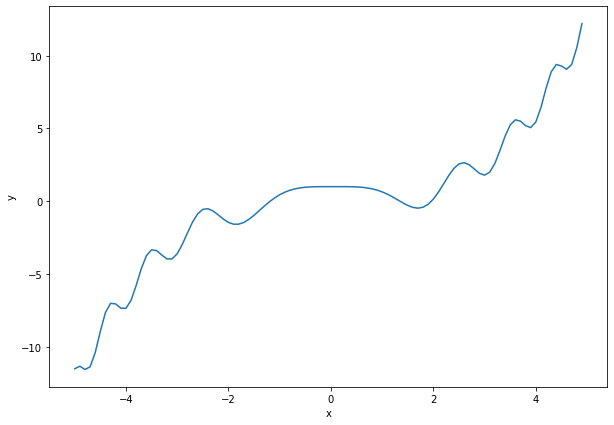

In [2]:
x=np.arange(-5,5,0.1)
y=np.cos(x*x)+0.1*np.power(x,3) 

plt.figure(figsize=(10,7))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.show()

---
2.    b) Plot y versus x for standard deviations, sigma=0.1, 0.2, 0.5, 1. Each line is in a different color. Use the regression function to see how close we can come to the truth in based on noisy measurements. 
    - Use Gaussian noise function in numpy to generate the data of y according to x with each standard deviation.
    - Run our linear regression, polynomial regression of degree 2 and degree 3, and using cross-validatio to see which model is best and is cloest to the truth line. 

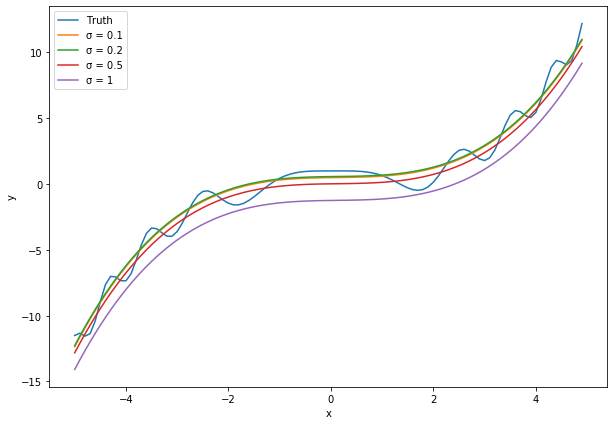

In [3]:
x=np.arange(-5,5,0.1)
y=np.cos(x*x)+0.1*np.power(x,3) 
sig=np.array([0.1,0.2,0.5,1]) #standard deviations
y1=y+np.random.normal(0,0.1) #Gaussian noise, sig=0.1, mean=0
y2=y+np.random.normal(0,0.2) #Gaussian noise, sig=0.2, mean=0
y3=y+np.random.normal(0,0.5) #Gaussian noise, sig=0.5, mean=0
y4=y+np.random.normal(0,1) #Gaussian noise, sig=1, mean=0

plt.figure(figsize=(10,7))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)

for i in range(len(sig)):
    x=x.reshape(-1,1)
    y1=y+np.random.normal(0,sig[i]) #Gaussian noise, sig, mean
    y1=y1.reshape(-1,1)
    data=np.concatenate((x,y1),axis=1)
    trainX=data[:int(len(data)*0.9)] #select 90% as training data, [ntrain x (nfeature + noutputs)] array
    noutputs=1
    
    w1=linear_regression(trainX) 
    e1=linear_cross_validation(trainX,5)
    w2=polynomial_regression(trainX,2)
    e2=polynomial_cross_validation(trainX,2,5)
    w3=polynomial_regression(trainX,3)
    e3=polynomial_cross_validation(trainX,3,5)
    
    if e1<e2 and e1<e3: #linear is closest
        w=w1
    elif e2<e1 and e2<e3: #polynomial degree 2 is cloest
        w=w2
    else: #polynomial degree 3 is cloest
        w=w3
        
    if len(w)==2: #linear
        y1=w[0]+w[1]*x
    elif len(w)==3: #polynomial degree 2
        y1=w[0]+w[1]*x+w[2]*x*x
    else: #polynomial degree 3
        y1=w[0]+w[1]*x+w[2]*x*x+w[3]*x*x*x
        
    plt.plot(x,y1)
    
plt.legend(['Truth','σ = 0.1', 'σ = 0.2', 'σ = 0.5', 'σ = 1'], loc='upper left')
plt.show()

---
2. c)  Run an experiment to see how close our regression is to the truth based on the variance of the noise and the number of training data.
    - Randomly generate a bunch of float numbers between -5 and +5 according to the training data that we want. Then, we calculate the value of these numbers with Gaussian noise.
    - Concatenate the numbers and values into our training data.
    - Apply the training to our linear regression, polynomial regression of degree 2 and degree 3, and output the cross-validation of each model. 
    - For the training data of size of 2, we just output the model since we can not do 5-fold corss-validatoin on 2 numbers of data.

Numer of traing data: 5 , standard deviation: 0.1
1. Linear w: [-0.74478372  1.3075195 ] cross-validation mse: 3.690874199452543
2. Polynomial degree 2 w: [-7.37754095e-01  1.30709624e+00 -7.30317149e-04] cross-validation mse: 26.757301945840247
3. Polynomial degree 3 w: [-0.77551293  0.3577956   0.05721429  0.07212561] cross-validation mse: 663.6203666742746


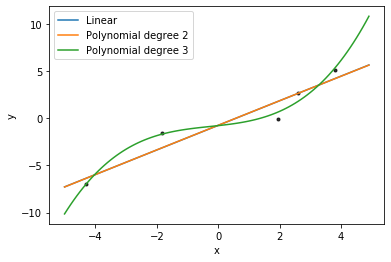

Numer of traing data: 5 , standard deviation: 0.2
1. Linear w: [0.01447085 1.46902949] cross-validation mse: 14.134116946301052
2. Polynomial degree 2 w: [-1.24646652  0.52694952  0.38661987] cross-validation mse: 41.69244847521533
3. Polynomial degree 3 w: [ 1.03845958  0.16796176 -0.4241403   0.18791189] cross-validation mse: 1491.4353306734677


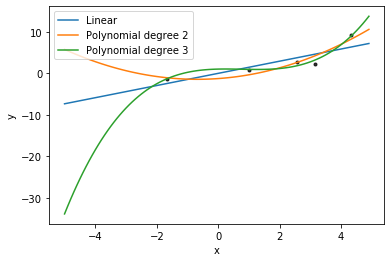

Numer of traing data: 5 , standard deviation: 0.5
1. Linear w: [2.01664148 1.71006815] cross-validation mse: 10.924397220140495
2. Polynomial degree 2 w: [0.23303976 0.68161744 0.31990507] cross-validation mse: 18.720242600164646
3. Polynomial degree 3 w: [ 1.48444913 -0.0583723  -0.52606424  0.2051392 ] cross-validation mse: 1.7931967554886055


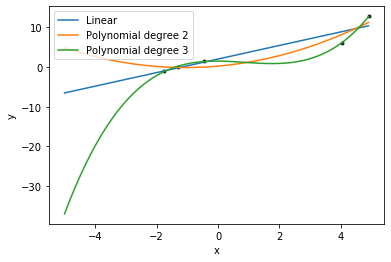

Numer of traing data: 5 , standard deviation: 1.0
1. Linear w: [2.32784494 0.03729286] cross-validation mse: 2.0463721423298673
2. Polynomial degree 2 w: [ 2.95803401 -0.17988752 -0.32429139] cross-validation mse: 1.033690001211064
3. Polynomial degree 3 w: [ 3.10863389  0.12641771 -0.43777626 -0.09118824] cross-validation mse: 1.5240724698947061


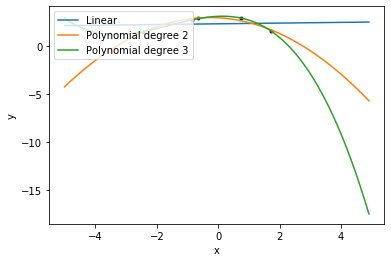



Numer of traing data: 10 , standard deviation: 0.1
1. Linear w: [-0.42849389  1.12154778] cross-validation mse: 4.517189959107227
2. Polynomial degree 2 w: [-0.46722903  1.1216061   0.00526821] cross-validation mse: 12.314944045192094
3. Polynomial degree 3 w: [ 0.02996132 -0.25120249 -0.00667621  0.11375353] cross-validation mse: 11.37094765295213


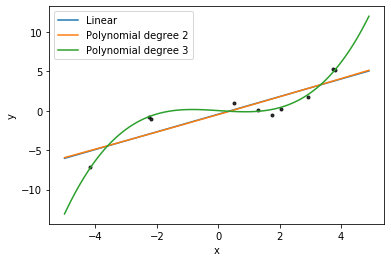

Numer of traing data: 10 , standard deviation: 0.2
1. Linear w: [1.67997568 1.90603973] cross-validation mse: 1.454558364029974
2. Polynomial degree 2 w: [ 2.18812809  1.96656471 -0.04593938] cross-validation mse: 1.3319156586902285
3. Polynomial degree 3 w: [ 0.7633156   0.71684021 -0.03319465  0.0649185 ] cross-validation mse: 4.567867475687481


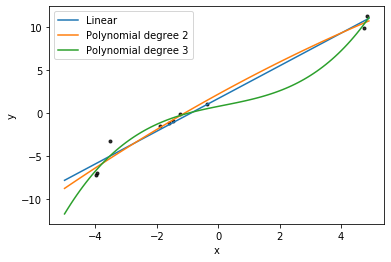

Numer of traing data: 10 , standard deviation: 0.5
1. Linear w: [1.2090349  1.21147701] cross-validation mse: 8.29245510066242
2. Polynomial degree 2 w: [-0.46651138  1.08962763  0.20329237] cross-validation mse: 7.938238896037331
3. Polynomial degree 3 w: [ 0.9454069  -0.23872078 -0.00343793  0.10762695] cross-validation mse: 1.1426934837512774


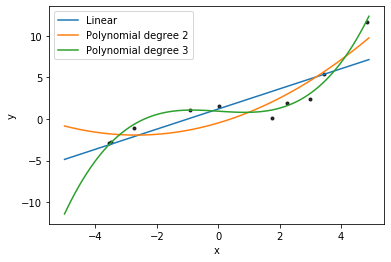

Numer of traing data: 10 , standard deviation: 1.0
1. Linear w: [-1.07152355  1.32341312] cross-validation mse: 2.5570925316666635
2. Polynomial degree 2 w: [-0.96682041  1.32003851 -0.0184462 ] cross-validation mse: 9.642607298082666
3. Polynomial degree 3 w: [-0.93871565  0.21992321  0.03556514  0.0853974 ] cross-validation mse: 67.31497243415957


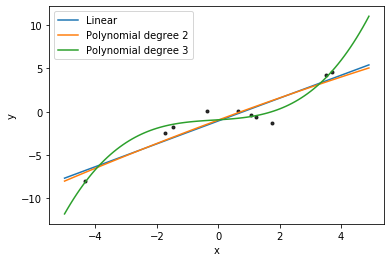



Numer of traing data: 20 , standard deviation: 0.1
1. Linear w: [0.11433989 1.57209713] cross-validation mse: 4.322355459225696
2. Polynomial degree 2 w: [ 0.15655759  1.5738081  -0.00692906] cross-validation mse: 7.1602296097676525
3. Polynomial degree 3 w: [ 0.2561584   0.23363081 -0.02156522  0.08469762] cross-validation mse: 1.085170965405811


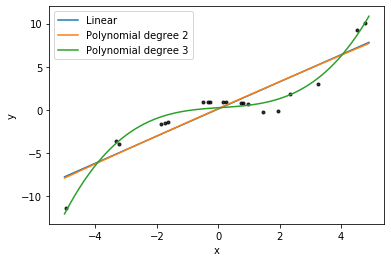

Numer of traing data: 20 , standard deviation: 0.2
1. Linear w: [-0.34945125  1.39988071] cross-validation mse: 4.856911017646897
2. Polynomial degree 2 w: [ 0.42359554  1.29167704 -0.09513256] cross-validation mse: 8.115033651333183
3. Polynomial degree 3 w: [ 0.01345502 -0.29411362 -0.01751455  0.10758611] cross-validation mse: 1.3095360205130517


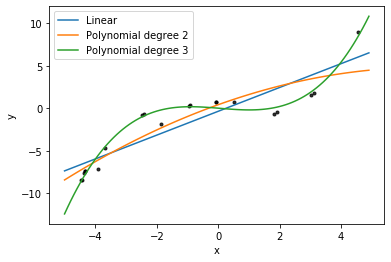

Numer of traing data: 20 , standard deviation: 0.5
1. Linear w: [-0.32389355  1.45763867] cross-validation mse: 9.5816211419551
2. Polynomial degree 2 w: [-0.15328946  1.4568886  -0.02366446] cross-validation mse: 38.38453293963499
3. Polynomial degree 3 w: [ 0.0612035  -0.34017616  0.00193986  0.11355585] cross-validation mse: 10.107499981905562


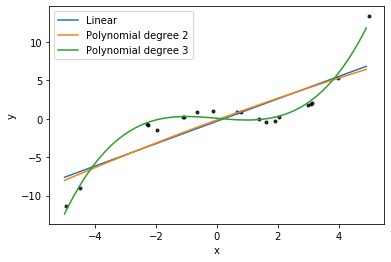

Numer of traing data: 20 , standard deviation: 1.0
1. Linear w: [0.60643662 1.34841613] cross-validation mse: 5.927226502023723
2. Polynomial degree 2 w: [ 2.7168614   0.98295002 -0.29162181] cross-validation mse: 3.450024325167771
3. Polynomial degree 3 w: [ 1.43271371 -0.01365578 -0.05064036  0.09809988] cross-validation mse: 1.2017673627456813


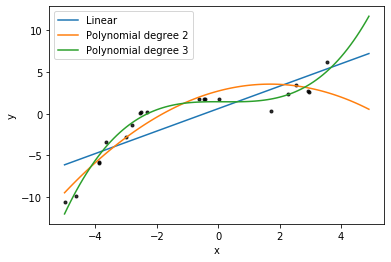



Numer of traing data: 50 , standard deviation: 0.1
1. Linear w: [0.13929984 1.44413629] cross-validation mse: 4.239776783585952
2. Polynomial degree 2 w: [ 0.25089251  1.44978813 -0.0137404 ] cross-validation mse: 4.858853032612539
3. Polynomial degree 3 w: [ 0.03201806  0.04767651 -0.02104322  0.09563134] cross-validation mse: 0.7403146414883263


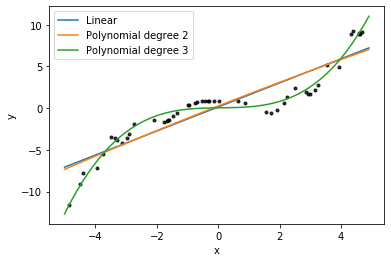

Numer of traing data: 50 , standard deviation: 0.2
1. Linear w: [-0.13039243  1.37863984] cross-validation mse: 3.772200903571118
2. Polynomial degree 2 w: [ 0.90338955  1.26065199 -0.15105119] cross-validation mse: 2.874613124501612
3. Polynomial degree 3 w: [ 0.32103041  0.0515617  -0.04586367  0.08947789] cross-validation mse: 0.5250870451639514


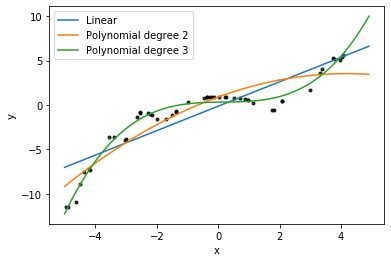

Numer of traing data: 50 , standard deviation: 0.5
1. Linear w: [0.421329   1.53531423] cross-validation mse: 5.016768009354239
2. Polynomial degree 2 w: [-0.00810146  1.49016473  0.05026191] cross-validation mse: 5.863581493876623
3. Polynomial degree 3 w: [ 0.1259613  -0.04685738 -0.01156181  0.10131017] cross-validation mse: 0.6897045122499202


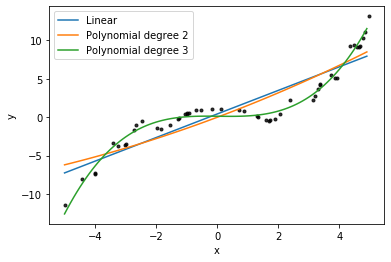

Numer of traing data: 50 , standard deviation: 1.0
1. Linear w: [-0.91458342  1.54766636] cross-validation mse: 4.408002133535756
2. Polynomial degree 2 w: [ 0.0056331   1.43354826 -0.1140783 ] cross-validation mse: 3.8441000129813743
3. Polynomial degree 3 w: [ 0.0799513  -0.05190666 -0.01803185  0.10161292] cross-validation mse: 0.6434948325914261


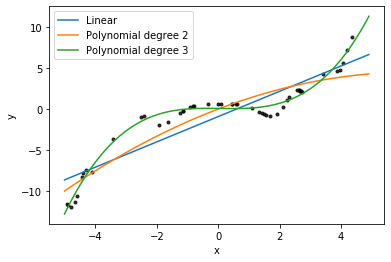



Numer of traing data: 100 , standard deviation: 0.1
1. Linear w: [-0.07965767  1.53782644] cross-validation mse: 4.213459533087447
2. Polynomial degree 2 w: [ 0.4425456   1.52562568 -0.05968448] cross-validation mse: 4.313366718341291
3. Polynomial degree 3 w: [ 0.25242306  0.05569673 -0.0254413   0.09782012] cross-validation mse: 0.5554479497287492


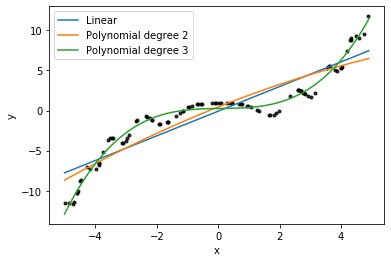

Numer of traing data: 100 , standard deviation: 0.2
1. Linear w: [0.20846492 1.48141289] cross-validation mse: 5.170488518950576
2. Polynomial degree 2 w: [ 0.50001176  1.47777475 -0.03784389] cross-validation mse: 5.184030668703867
3. Polynomial degree 3 w: [ 0.4751822  -0.13856966 -0.02973361  0.1070601 ] cross-validation mse: 0.49776101299037084


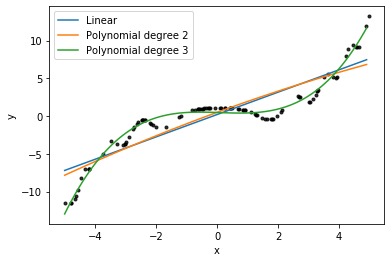

Numer of traing data: 100 , standard deviation: 0.5
1. Linear w: [0.4739746  1.50006677] cross-validation mse: 4.222625861443527
2. Polynomial degree 2 w: [ 0.75614297  1.49541808 -0.0317855 ] cross-validation mse: 4.21662546289895
3. Polynomial degree 3 w: [ 0.91318268 -0.06460053 -0.01753122  0.10043556] cross-validation mse: 0.5660715479348466


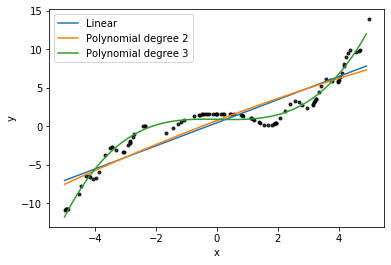

Numer of traing data: 100 , standard deviation: 1.0
1. Linear w: [0.93874608 1.39310727] cross-validation mse: 4.80903809525029
2. Polynomial degree 2 w: [ 1.39978604  1.37116358 -0.05875177] cross-validation mse: 4.746633009364078
3. Polynomial degree 3 w: [ 1.30582368 -0.10596418 -0.02290469  0.10644184] cross-validation mse: 0.4904879320139539


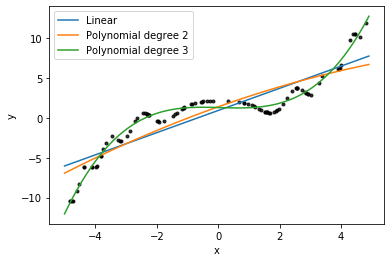



Numer of traing data: 200 , standard deviation: 0.1
1. Linear w: [0.30123812 1.45152445] cross-validation mse: 3.2573672760336243
2. Polynomial degree 2 w: [ 0.51714562  1.45687764 -0.0265652 ] cross-validation mse: 3.345601875076169
3. Polynomial degree 3 w: [ 0.41379074  0.04160028 -0.02827016  0.09822325] cross-validation mse: 0.4672321681215978


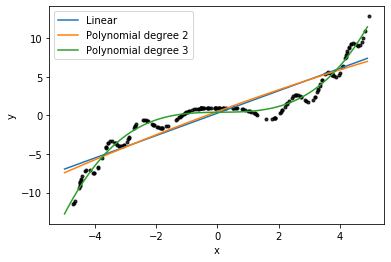

Numer of traing data: 200 , standard deviation: 0.2
1. Linear w: [0.13731042 1.4255549 ] cross-validation mse: 4.156158382852853
2. Polynomial degree 2 w: [ 0.39825811  1.42286883 -0.03153865] cross-validation mse: 4.239360115737214
3. Polynomial degree 3 w: [ 0.34864114 -0.0510341  -0.0172815   0.10439994] cross-validation mse: 0.4861534347586554


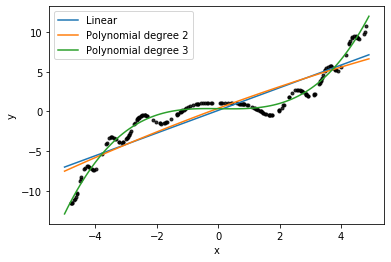

Numer of traing data: 200 , standard deviation: 0.5
1. Linear w: [0.07807804 1.5306685 ] cross-validation mse: 4.537554356397864
2. Polynomial degree 2 w: [ 0.09943145  1.53090674 -0.002472  ] cross-validation mse: 4.625377295654561
3. Polynomial degree 3 w: [ 0.19966828 -0.02806373 -0.01086498  0.10230181] cross-validation mse: 0.5094224922848946


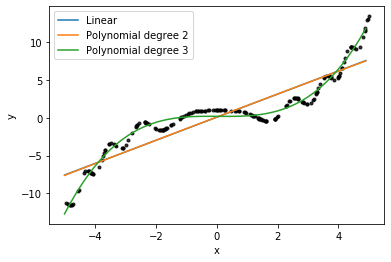

Numer of traing data: 200 , standard deviation: 1.0
1. Linear w: [-1.59721329  1.5252992 ] cross-validation mse: 3.7999740796982806
2. Polynomial degree 2 w: [-1.83291973  1.50634007  0.02960603] cross-validation mse: 3.790912359438937
3. Polynomial degree 3 w: [-1.52055624  0.04217277 -0.02903748  0.09880021] cross-validation mse: 0.5103887393221489


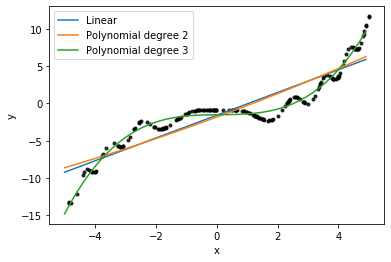



Numer of traing data: 500 , standard deviation: 0.1
1. Linear w: [0.14910801 1.49929195] cross-validation mse: 4.372305540664148
2. Polynomial degree 2 w: [0.13453124 1.49890259 0.00176828] cross-validation mse: 4.396517179687083
3. Polynomial degree 3 w: [ 0.23299085 -0.02988366 -0.02008378  0.10232646] cross-validation mse: 0.5292925737193201


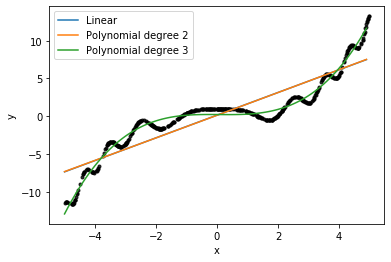

Numer of traing data: 500 , standard deviation: 0.2
1. Linear w: [-0.02408849  1.50127647] cross-validation mse: 4.122211106849109
2. Polynomial degree 2 w: [ 0.24320731  1.50004303 -0.03302669] cross-validation mse: 4.091512124656056
3. Polynomial degree 3 w: [ 0.21613135 -0.01644835 -0.02745618  0.10201418] cross-validation mse: 0.503088871851623


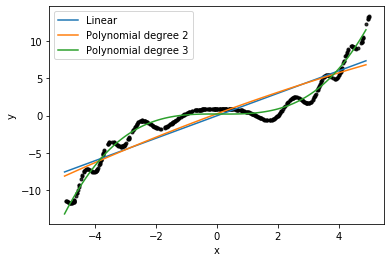

Numer of traing data: 500 , standard deviation: 0.5
1. Linear w: [-0.04165655  1.50265609] cross-validation mse: 3.8763786026657336
2. Polynomial degree 2 w: [ 0.1624453   1.5032796  -0.02462656] cross-validation mse: 3.85785970214678
3. Polynomial degree 3 w: [ 0.18857659  0.03358876 -0.02329036  0.09787462] cross-validation mse: 0.5193331437027983


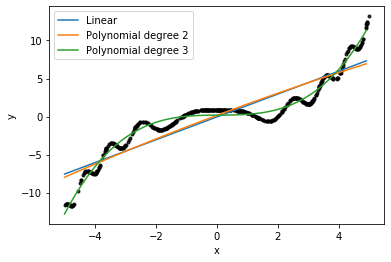

Numer of traing data: 500 , standard deviation: 1.0
1. Linear w: [-0.89345083  1.44741849] cross-validation mse: 3.928055569403913
2. Polynomial degree 2 w: [-0.71004346  1.44662981 -0.02227656] cross-validation mse: 3.923795822786309
3. Polynomial degree 3 w: [-0.6696658   0.00194707 -0.02012811  0.09806429] cross-validation mse: 0.532439958001555


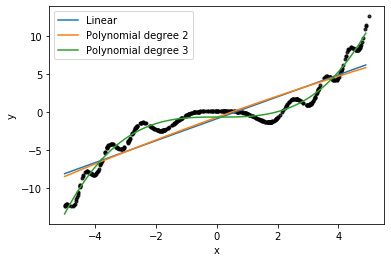



Numer of traing data: 2 , standard deviation: 0.1
1. Linear w: [1.02406893 0.04852421]
2. Polynomial degree 2 w: [0.10871075 0.07899745 1.36562775]
3. Polynomial degree 3 w: [-0.58411423  8.02432338  4.67790745  7.56613482]
Numer of traing data: 2 , standard deviation: 0.2
1. Linear w: [1.33969643 1.05851315]
2. Polynomial degree 2 w: [ 1.06886862  0.44855696 -0.56768609]
3. Polynomial degree 3 w: [ 1.11172429  0.31097183 -0.74633239  0.53238983]
Numer of traing data: 2 , standard deviation: 0.5
1. Linear w: [4.36035381 3.05255722]
2. Polynomial degree 2 w: [-0.8946085   5.23611575  0.02242383]
3. Polynomial degree 3 w: [-0.72158536  0.24052845  0.0180636   0.16275411]
Numer of traing data: 2 , standard deviation: 1.0
1. Linear w: [0.24171091 0.5845235 ]
2. Polynomial degree 2 w: [-1.48190847  2.56658358  0.2266    ]
3. Polynomial degree 3 w: [ 0.14198388  0.16857898 -0.02423323  0.06832168]


In [4]:
x=np.array([5,10,20,50,100,200,500]) #number of traning data
sig=np.array([0.1,0.2,0.5,1]) #standard deviations
dataW=[] #store all the ws
dataE=np.array([]) #store all the errors
for i in x:
    for j in sig:
        print("Numer of traing data:",i,", standard deviation:",j)
        dataX=np.random.uniform(low=-5.0,high=5.0,size=i) #generate random number of size i
        dataX=dataX.reshape(-1,1)
        dataY=np.cos(dataX*dataX)+0.1*np.power(dataX,3)+np.random.normal(0,j) #get the truth value with variance of the noise
        dataXY=np.concatenate((dataX,dataY),axis=1) #combine X,Y to a traing data
        
        w1=linear_regression(dataXY)
        e1=linear_cross_validation(dataXY,5)
        dataW.append(w1)
        dataE=np.append(dataE,e1)
        print("1. Linear w:",w1,"cross-validation mse:",e1)
        
        w2=polynomial_regression(dataXY,2)
        e2=polynomial_cross_validation(dataXY,2,5)
        dataW.append(w2)
        dataE=np.append(dataE,e2)
        print("2. Polynomial degree 2 w:",w2,"cross-validation mse:",e2)
        
        w3=polynomial_regression(dataXY,3)
        e3=polynomial_cross_validation(dataXY,3,5)
        dataW.append(w3)
        dataE=np.append(dataE,e3)
        print("3. Polynomial degree 3 w:",w3,"cross-validation mse:",e3)
        
        x=np.arange(-5,5,0.1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter(dataX,dataY,alpha=0.8,color='black', marker='.')
        plt.plot(x,w1[0]+w1[1]*x)
        plt.plot(x,w2[0]+w2[1]*x+w2[2]*x*x)
        plt.plot(x,w3[0]+w3[1]*x+w3[2]*x*x+w3[3]*x*x*x)
        plt.legend(['Linear','Polynomial degree 2','Polynomial degree 3'], loc='upper left')
        plt.show()
        
    print("\n")

#size of 2, exception
for j in sig:
        print("Numer of traing data:",2,", standard deviation:",j)
        dataX=np.random.uniform(low=-5.0,high=5.0,size=2) #generate random number of size i
        dataX=dataX.reshape(-1,1)
        dataY=np.cos(dataX*dataX)+0.1*np.power(dataX,3)+np.random.normal(0,j) #get the truth value with variance of the noise
        dataXY=np.concatenate((dataX,dataY),axis=1) #combine X,Y to a traing data
        
        w=linear_regression(dataXY)
        print("1. Linear w:",w)
        w=polynomial_regression(dataXY,2)
        print("2. Polynomial degree 2 w:",w)
        w=polynomial_regression(dataXY,3)
        print("3. Polynomial degree 3 w:",w)
        

---
2. d) Select the two best results (lowest error) and two worst results (highest error) from part c) and make four plots. Each plot shows the truth line we plotted in part a) and the learned regression model.
    - Record all the models and the errors from part c). 
    - Sort the erros with their indexes. Thus, we can find which two are the best results from begining and which two are the worst results from ending.
    - Retrive the models and draw the plots.

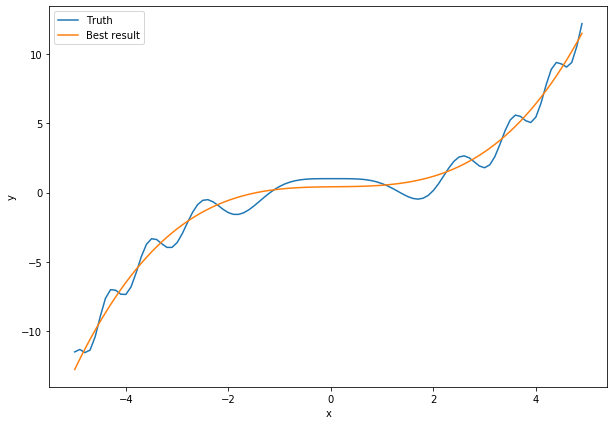

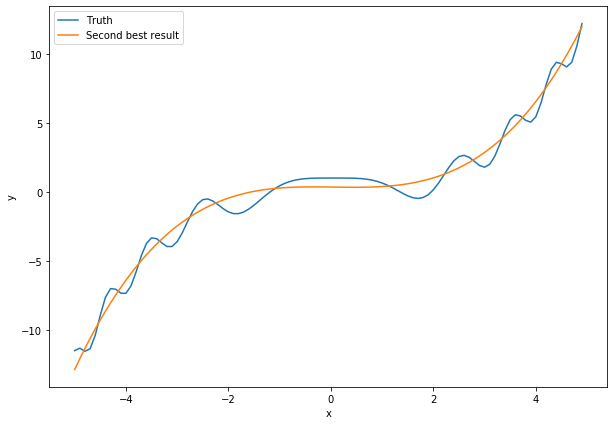

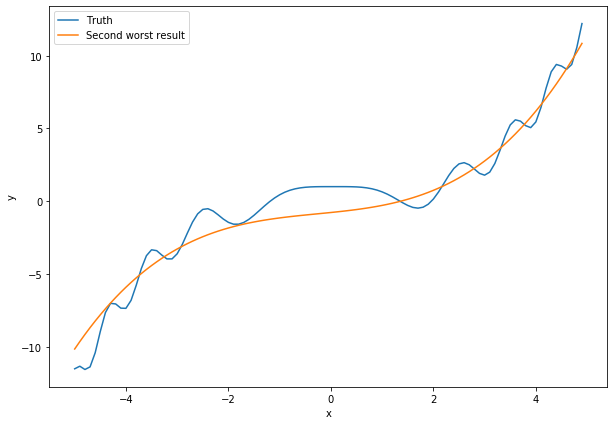

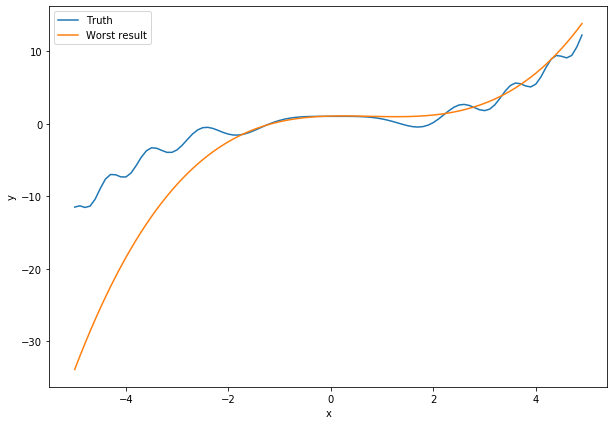

In [5]:
sortE=np.argsort(dataE) #returns the indices that would sort an array
#the best result(lowest error), the second best result, the second worst result, the worst result(highest error)
names=['Best result','Second best result','Second worst result','Worst result']
plots=[dataW[sortE[0]],dataW[sortE[1]],dataW[sortE[-2]],dataW[sortE[-1]]]

for i,p in enumerate(plots):
    x=np.arange(-5,5,0.1)
    if len(p)==2: #linear
        y1=p[0]+p[1]*x
    elif len(p)==3: #polynomial degree 2
        y1=p[0]+p[1]*x+p[2]*x*x
    else: #polynomial degree 3
        y1=p[0]+p[1]*x+p[2]*x*x+p[3]*x*x*x

    y=np.cos(x*x)+0.1*np.power(x,3) 
    plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x,y)
    plt.plot(x,y1)
    plt.legend(['Truth',names[i]], loc='upper left')
    plt.show()

- Analysis:

    Based on all plots we got, it is easy to be noticed that "Best Result" and "Second Best Result" can reach good regression conclusions. Though "Second Best Result" regression may be better than "Best Result" regression and "Worst Result" may be better than "Second Worst Result" sometimes, the outcome is still reasonable due to that we can see the trend of regression under such limited data set. This is because the mean squared error is computed based on the number of training data that generated randomly, for sonme small datasets, the results may be not reasonable when we compare the whole model to the truth line.

---
3. Run our regression algorithm for the three UCI data sets.
    - Load data
    - Select 80% of the data as training data and the rest 20% as test data
    - Normalize both the features and the output of the traininf by subtracting by the mean of each column of the data and dividing by the standard deviation of each column of the data 
    - Apply the training to my_regression function, run 5-fold cross-validation to estimate the squared error of learned models: linear, polynomial of degree 2, and polynomial of degree 3.
    - Select the best model from the results of cross-validation and use this model to make predication for the test data.

In [6]:
airfoil_data=np.loadtxt('airfoil_self_noise.dat') #Airfoil Self-Noise, 5 input variables, 1 output variable
data=np.asarray(airfoil_data) #convert to numpy array
trainX=data[:int(len(data)*0.8)] #select 80% as training data, [ntrain x (nfeature + noutputs)] array
#print("TrainX Data:\n",trainX,"\n")
trainX=abs(trainX-np.mean(trainX,axis=0))/np.std(trainX,axis=0)#normalize both the features and the output by subtracting by the mean of each column of the data and dividing by the standard deviation of each column of the data 

noutputs=1
testX=data[int(len(data)*0.8):][:,:-noutputs] #select 20% as test data and choose the features, [ntest x nfeatures] array
#print("TestX Data:\n",testX,"\n")

predX=my_regression(trainX,testX,noutputs)
print("Output prediction values for the testX data:\n",predX) #make a predication of the test data


----------------------------------------------------------------------
Linear Regression
Bias: [0.64377705]
Coefficients: [ 0.17124803 -0.18894079  0.01668817  0.05006107  0.19987893]
MSE: 0.3582061169923174 

Polynomial Regression (Degree 2)
Bias: [0.54370531]
Coefficients: [ 0.63569704 -0.81158193 -0.03016913  0.07171521  0.77796393 -0.0330457
  0.19601771 -0.02852431  0.05630393 -0.76750337  0.1539925   0.26327257
  0.04433323 -0.08672131 -0.03225866  0.01943262 -0.11789063  0.00102198
 -0.18427385  0.05731094]
MSE: 0.726760183448639 

Polynomial Regression (Degree 3)
Bias: [1.22964272]
Coefficients: [ 5.82519765e-01 -2.33090400e-01 -2.21571916e+00 -5.56306865e-01
 -1.36484209e+00  3.14407041e-01 -5.91919382e-01 -4.37094764e-01
 -5.00769859e-01 -3.49977905e-01  2.68696207e-01 -1.17076924e+00
  3.72952263e-01 -7.63329479e-02  4.10346330e+00  8.10766851e-01
 -3.87096405e-01 -1.95704670e-01  1.27609834e+00  1.28402680e+00
 -2.44941218e-02 -6.55494523e-02 -4.46606213e-02  2.79173334e-02

In [7]:
yacht_data=np.loadtxt('yacht_hydrodynamics.data') #Yacht Hydrodynamics, 6 input variables, 1 output variable
data=np.asarray(yacht_data) #convert to numpy array
trainX=data[:int(len(data)*0.8)] #select 80% as training data, [ntrain x (nfeature + noutputs)] array
#print("TrainX Data:\n",trainX,"\n")
trainX=abs(trainX-np.mean(trainX,axis=0))/np.std(trainX,axis=0)#normalize both the features and the output by subtracting by the mean of each column of the data and dividing by the standard deviation of each column of the data 
noutputs=1
testX=data[int(len(data)*0.8):][:,:-noutputs] #select 20% as test data and choose the features, [ntest x nfeatures] array
#print("TestX Data:\n",testX,"\n")

predX=my_regression(trainX,testX,noutputs)
print("Output prediction values for the testX data:\n",predX) #make a predication of the test data

----------------------------------------------------------------------
Linear Regression
Bias: [0.02970876]
Coefficients: [-8.78264336e-05  2.42718180e-02  2.07035265e-02  8.13160607e-03
 -2.72074721e-03  7.93970985e-01]
MSE: 0.2930622622434149 

Polynomial Regression (Degree 2)
Bias: [0.9656206]
Coefficients: [-0.10752995 -0.77698696 -0.26492301 -0.8245564  -0.07016681 -1.48261088
 -0.09476828 -0.81555024  0.4040692   3.22702845 -0.15363724 -0.0124114
  0.32670705 -0.49570747  0.51226074  0.63375554  0.00591453 -0.0921757
  0.31420507  0.09753276  0.03935753  0.26680171 -0.08331433  0.00835871
  0.12903119 -0.01327375  1.29889564]
MSE: 114.59138599611977 

Polynomial Regression (Degree 3)
Matrix is irreversible!
---------------------------------------------------------------------- 

Linear regression is best!

Output prediction values for the testX data:
 [[0.42762206]
 [0.44747134]
 [0.46732061]
 [0.48716989]
 [0.50701916]
 [0.52686844]
 [0.26270522]
 [0.28255449]
 [0.30240377]
 [0.

In [8]:
slump_data=np.loadtxt('slump_test.data',delimiter=',',skiprows=1) #Concrete Slump, 7 input variables, 3 output variable  
data=np.asarray(slump_data) #convert to numpy array
trainX=data[:int(len(data)*0.8)] #select 80% as training data, [ntrain x (nfeature + noutputs)] array
#print("TrainX Data:\n",trainX,"\n")
trainX=abs(trainX-np.mean(trainX,axis=0))/np.std(trainX,axis=0)#normalize both the features and the output by subtracting by the mean of each column of the data and dividing by the standard deviation of each column of the data 
noutputs=3
testX=data[int(len(data)*0.8):][:,:-noutputs] #select 20% as test data and choose the features, [ntest x nfeatures] array
#print("TestX Data:\n",testX,"\n")

predX=my_regression(trainX,testX,noutputs)
print("Output prediction values for the testX data:\n",predX) #make a predication of the test data

----------------------------------------------------------------------
Linear Regression
Bias: [0.90001048 0.92740726 0.58134856]
Coefficients: [-0.02095419 -0.1842471  -0.04000297  0.0131595   0.2248632   0.40765364
 -0.17927058 -0.31441119  0.37794648 -0.11117367 -0.14406275 -0.16042295
  0.09796902  0.15594665 -0.09063874  0.35392679  0.30072633 -0.04348787
 -0.07552773  0.02795554 -0.21010082 -0.20706551 -0.20556711 -0.10940966]
MSE: 1.9068847634508366 

Polynomial Regression (Degree 2)
Bias: [-1.93155985 -0.88728041  0.80893809]
Coefficients: [ 1.65032858  0.61817855 -1.0507972   4.72221938  2.06867757  0.51880765
  0.0424804   2.14432774 -1.5255797   0.72288694 -0.06244024  0.03135627
  1.20375401  0.01971089  0.53297477  0.65528973  0.08178102 -0.14460132
 -0.38812186 -0.16326982  0.78301012  0.34230703  0.38636882 -0.82448257
 -0.69937987  0.08020166  0.36778585  0.25529614 -0.07871894  0.21388809
 -0.8648809  -0.89712965  0.01742388  0.08787454  0.38343829  0.20924163
  0.5926

---
Question 3
- Are the results reasonable? Do you get squared errors that are close to mine?

    The resluts we get are reasonable. And we set all the size of training set is 80% of original data set.The left 20% is set as test set.<br>Compared our liner basis regression with the given squared errors:<br>For Airfoil Self-Noise, we get overall MSE 0.35820611699231786 which is about 4 times of given squared error.<br>For Yacht Hydrodynamics, we get overall MSE 0.2930622622434166 which is about 4 times of given squared error.<br>For Concrete Slump, our overall MSE of linear basis regression is 1.9068847634508352 which is about 11 times of given squared error.<br>Based on the difference between MSE we get and given MSE which is not huge, we think that our results are reasonable.
  
  
- Can you do better than linear basis function prediction?

    In our regression effort, we tried polynomial regression with degree 2 and 3. Based on MSE, we found linear regression is the best one in all cases.
    

---
Overall

- Our code has been commented. The comments show what we do in every step in regression and cross-validataion, how to choose the best regression model based on overall cross-validation and how to get outputs with the chosen model. Based on our implementation of regression and comparison among overall cross-validation of different models, we get a good analysis during regression model chosing. With matplotlib, we get good plot for asked questions. Overall, our group work is great with pretty good question analysis, strong code and beautiful paper work.